## Project Goals
* Load data
* Examine data
  * Display (e.g. bar chart) class distribution of target variable (TenYearCHD)
* Prepare data for model training
  * Perform the following data preparation steps
    * Handle missing values
    * Variable encoding
    * Feature scaling
    * Principal component analysis (PCA)
      * NOTE: Binary variables are not ideal for Principal Component Analysis (PCA), particularly because PCA is designed for continuous, normally distributed data  
  * Do not delete any rows
  * Do not drop any columns, EXCEPT when performing variable encoding and PCA
* Display a sample of 20 rows of the final set of independent variables used for all the model trainings
* Train logistic regression model
  * Must set **class_weight** hyperparameter AND at least 1 other hyperparameter (not including random_state)
    * The hyperparameter values you set CANNOT be the same as the defaults
    * You can modify as many hyperparameters as your want
  * Calculate and display model accuracy
    * **NOTE: Logistic regression model accuracy must exceed 65%**
* Train the following classification models (KNN, Random Forest & SVC).  For the SVC model, you can use any SVC classifier.  Perform the following for each model:
  * Must modify at least 2 hyperparameters (not including random_state) in each model
    * The hyperparameter values you set CANNOT be the same as the defaults
    * You can modify as many hyperparameters as your want
    * For random forest and SVC, use the same class_weight hyperparameter value used for logistic regression
    * If you used hyperparameter random_state in your Logistic Regression model training, use the same value when training the other models
    * Do NOT re-split training and test sets when training the other models
  * Calculate and display this model's accuracy
    * **NOTE: For each of these 3 classification models, model accuracy MUST exceed 80%**
* Display (e.g. bar chart) model accuracy for all 4 models

#### NOTES
- You must TRY to resolve all errors and warnings
- You may set random_state hyperparameter to control the accuracy output

In [1]:
from datetime import datetime
print(f'Run time: {datetime.now().strftime("%D %T")}')

Run time: 02/22/25 12:50:37


### Import libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Add other imports as needed
from sklearn.impute import SimpleImputer             # for handling missing data
from sklearn.preprocessing import LabelEncoder       # for encoding label data
from sklearn.preprocessing import StandardScaler     # for standardizing the data
from sklearn.preprocessing import OrdinalEncoder
from sklearn import decomposition
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


### Load data

Objective  
> Predict if a patient has a 10-year risk of developing coronary heart disease (CHD).

Problem  
> The World Health Organization has estimated 12 million deaths occur worldwide, every year due to Heart diseases. Half the deaths in the United States and other developed countries are due to cardio vascular diseases. The early prognosis of cardiovascular diseases can aid in making decisions on lifestyle changes in high risk patients and in turn reduce the complications. This research intends to pinpoint the most relevant/risk factors of heart disease as well as predict the overall risk using logistic regression Data Preparation

Source
> The source dataset is publically available on the Kaggle website, and it is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has 10-year risk of future coronary heart disease (CHD).The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes. Variables Each attribute is a potential risk factor. There are both demographic, behavioral and medical risk factors.

> **NOTE: The professor has modified this dataset for the purposes of this assignment.  You must use this modified dataset for this homework.**

Demographic Attributes:
> gender: Male / Female  
> age: integer  
> attended_college: whether or not the patient attended college

Behavioral Attributes:
> currentSmoker: whether or not the patient is a current smoker  
> cigsPerDay: the number of cigarettes that the person smoked on average in one day

Medical History Attributes:
> BPMeds: whether or not the patient was on blood pressure medication  
> prevalentStroke: whether or not the patient had previously had a stroke  
> prevalentHyp: whether or not the patient was hypertensive  
> diabetes: whether or not the patient had diabetes.

Current Medical Condition Attributes (continuous variables):
> totChol: total cholesterol level  
> sysBP: systolic blood pressure  
> diaBP: diastolic blood pressure  
> BMI: Body Mass Index  
> heartRate: heart rate  
> glucose: glucose level  

Target variable to predict:
> TenYearCHD: 10 year risk of coronary heart disease (CHD)

In [3]:
# Read data from file (Framingham_heart_disease_4000.csv) into dataframe
df = pd.read_csv('../data/Framingham_heart_disease_4000.csv', sep=',')

### Examine data

In [4]:
pd.set_option('display.max_columns', None)

In [5]:
# Review dataframe shape
df.shape

(4000, 16)

In [6]:
# Display a sample of 5 rows from dataframe
df.sample(5)

,gender,age,attended_college,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
192,Male,60,n,Yes,9.0,no,NO,no,N,166.0,141.0,81.0,19.42,67.0,101.0,N
3260,Female,58,n,Yes,20.0,no,NO,no,N,215.0,119.5,73.0,29.86,67.0,93.0,Y
2626,Female,70,n,No,0.0,no,YES,yes,N,107.0,143.0,93.0,NaN,68.0,62.0,Y
1393,Female,53,y,No,0.0,no,NO,yes,N,238.0,172.5,91.0,24.16,112.0,NaN,N
3190,Female,54,y,No,0.0,no,NO,yes,N,258.0,148.0,93.0,20.51,74.0,95.0,N


### Display bar chart showing class distribution for target variable (TenYearCHD)

In [7]:
# Display class distribution counts
df.TenYearCHD.value_counts()

TenYearCHD
N    3402
Y     598
Name: count, dtype: int64

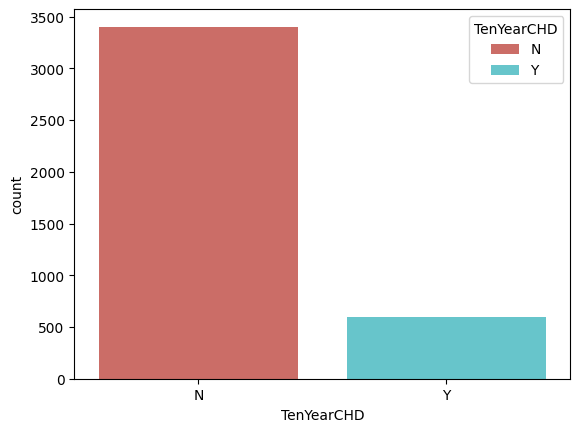

In [8]:
# Display bar chart showing class distribution
sns.countplot(x='TenYearCHD', hue='TenYearCHD', data=df, palette='hls', legend=True)
plt.show()

### Prepare data for model training
* Do not delete any rows
* Do not drop any columns, EXCEPT when performing variable encoding and PCA

#### Check for missing values

In [9]:
df.isnull().sum()

gender                0
age                   0
attended_college    100
currentSmoker         0
cigsPerDay           27
BPMeds               48
prevalentStroke       0
prevalentHyp          0
diabetes              0
totChol              49
sysBP                 0
diaBP                 0
BMI                  18
heartRate             0
glucose             365
TenYearCHD            0
dtype: int64

#### Use the SimpleImputer to replace missing values

In [10]:
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
df['cigsPerDay'] = imp_mean.fit_transform(df[['cigsPerDay']])
df['totChol'] = imp_mean.fit_transform(df[['totChol']])
df['BMI'] = imp_mean.fit_transform(df[['BMI']])
df['glucose'] = imp_mean.fit_transform(df[['glucose']])

In [11]:
imp_most_freq  = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
df['attended_college'] = imp_most_freq.fit_transform(df[['attended_college']]).ravel()
df['BPMeds'] = imp_most_freq.fit_transform(df[['BPMeds']]).ravel()

#### Check for missing values again

In [12]:
df.isnull().sum()

gender              0
age                 0
attended_college    0
currentSmoker       0
cigsPerDay          0
BPMeds              0
prevalentStroke     0
prevalentHyp        0
diabetes            0
totChol             0
sysBP               0
diaBP               0
BMI                 0
heartRate           0
glucose             0
TenYearCHD          0
dtype: int64

### Perform variable encoding

In [13]:
# Generate encodings for 'attended_college', 'gender'
# I do not believe these columns have anything related to the dependant variable 
df = pd.get_dummies(df, columns=['attended_college'], dtype=int)
df = pd.get_dummies(df, columns=['gender'], dtype=int)

In [14]:
# ordinal encode BPMeds, currentSmoker, prevalentStroke, prevalentHyp, diabetes
# I believe that these columns are somewhat related to the dependant variable, I'll ordinal encode where 0 is good and 1 is bad 

print("BPMeds", df['BPMeds'].unique(),
      "\ncurrentSmoker", df['currentSmoker'].unique(),
      "\nprevalentStroke",df['prevalentStroke'].unique(),
      "\nprevalentHyp",df['prevalentHyp'].unique(),
      "\ndiabetes",df['diabetes'].unique())



BPMeds ['yes' 'no'] 
currentSmoker ['Yes' 'No'] 
prevalentStroke ['NO' 'YES'] 
prevalentHyp ['yes' 'no'] 
diabetes ['N' 'Y']


In [15]:
#ordinal encode continued, reminder: I'll ordinal encode where 0 is good and 1 is bad 
oe = OrdinalEncoder(categories=[['no', 'yes']])
df['BPMeds'] = oe.fit_transform(df[['BPMeds']])

oe = OrdinalEncoder(categories=[['No', 'Yes']])
df['currentSmoker'] = oe.fit_transform(df[['currentSmoker']])

oe = OrdinalEncoder(categories=[['NO', 'YES']])
df['prevalentStroke'] = oe.fit_transform(df[['prevalentStroke']])

oe = OrdinalEncoder(categories=[['no', 'yes']])
df['prevalentHyp'] = oe.fit_transform(df[['prevalentHyp']])

oe = OrdinalEncoder(categories=[['N', 'Y']])
df['diabetes'] = oe.fit_transform(df[['diabetes']])

In [16]:
# Encode 'TenYearCHD' column, this is dependant var 
le = LabelEncoder()
df['TenYearCHD'] = le.fit_transform(df['TenYearCHD'])
print (le.classes_, le.transform(list(le.classes_)))

['N' 'Y'] [0 1]


In [17]:
df.head()

,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,attended_college_n,attended_college_y,gender_Female,gender_Male
0,42,1.0,15.0,1.0,0.0,1.0,0.0,222.0,143.0,92.0,27.38,78.0,89.0,0,1,0,0,1
1,43,1.0,40.0,0.0,0.0,1.0,0.0,220.0,165.0,105.0,31.07,75.0,114.0,0,1,0,0,1
2,59,0.0,0.0,0.0,0.0,0.0,0.0,237.0,131.5,84.0,24.17,90.0,94.0,1,1,0,0,1
3,56,0.0,0.0,0.0,0.0,0.0,0.0,261.0,145.0,77.0,26.67,73.0,95.0,0,1,0,1,0
4,42,0.0,0.0,0.0,0.0,0.0,0.0,183.0,111.0,71.0,19.78,66.0,81.0,0,0,1,1,0


### Separate independent and dependent variables
* Independent variables: All variables EXCEPT TenYearCHD
* Dependent variable: TenYearCHD

In [18]:
X = df.drop("TenYearCHD", axis=1)
y = df["TenYearCHD"]

In [19]:
# I want to separate binary data from continuous so that PCA is not impacted. Also scaling binary data doesn't make much sense 
binary_cols = ["currentSmoker", "BPMeds", "prevalentStroke", "prevalentHyp", "diabetes", "attended_college_n","attended_college_y", "gender_Female", "gender_Male" ]
binary_data = X[binary_cols]  # Extract binary variables
X = X.drop(columns=binary_cols)  # Extract all remaining continuous variables 

#### Standardize the independent variables

In [20]:
scaler = StandardScaler()

In [21]:

X_scaled = scaler.fit_transform(X)
X_scaled
pd.DataFrame(X_scaled).sample(20, random_state=42)

,0,1,2,3,4,5,6,7
555,-1.582436,0.083367,-0.506587,-0.601890,-0.574581,-1.010628,-0.735503,-0.303274
3491,0.638773,0.925942,0.125086,-0.556535,0.263474,0.237919,-1.734997,-0.389452
527,-0.413379,0.083367,3.509050,-0.874018,-1.245025,-0.599342,-0.485629,-0.820346
3925,-0.881002,-0.000891,-1.160820,-0.420472,-0.742192,-0.339840,0.597156,0.429246
2989,-0.647190,-0.422178,-0.371228,0.123784,0.682501,0.350534,-0.485629,0.256889
70,0.404961,2.863865,0.034847,-0.284408,-0.909803,-0.587101,-1.151959,-0.389452
1756,-0.296473,0.925942,-0.371228,0.010398,0.347279,0.534143,-0.902085,-0.303274
211,-0.413379,-0.759208,0.643961,-0.783309,-0.281262,1.028666,-2.151453,-0.906525
196,0.989490,-0.759208,0.102527,1.439069,1.185334,1.562359,-0.902085,-1.208151
803,-0.647190,0.925942,-1.792493,-1.100791,-1.077414,-1.282371,-1.318541,-0.001648


### Perform principal component analysis (PCA)

In [22]:
pca = decomposition.PCA(n_components=3, random_state=42)
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)

X_pca.shape

(4000, 3)

In [23]:
X_pca

array([[ 0.43909417,  1.0991912 , -0.39143255],
       [ 1.78416555,  2.54833346, -0.23979276],
       [ 0.66842257, -0.41570463,  1.01516581],
       ...,
       [-0.78455562, -0.80313136, -0.6593281 ],
       [-2.65914966,  1.00332599,  0.20322078],
       [-1.67701136,  0.9307586 ,  0.65856792]])

### Display a sample of 20 rows from the final set of independent variables used for all the model trainings

In [25]:

pd.DataFrame(X_pca).sample(20, random_state=42)

,0,1,2
555,-1.887663,0.233549,-0.464378
3491,-0.318551,-0.608576,-0.701624
527,-0.828885,-0.901039,1.500526
3925,-1.199399,0.626253,0.159622
2989,0.244489,0.005303,-0.733505
70,-1.344148,0.732365,0.310897
1756,-0.145787,0.439222,-0.910685
211,-0.621340,-1.522213,-1.498877
196,2.142252,-0.783685,-1.981770
803,-2.708609,-0.005970,-0.510101


### Display a sample of 5 rows from the final set of dependent variables used for all the model trainings

In [26]:
y.sample(5)

1164    0
3917    0
1555    0
1260    0
2115    0
Name: TenYearCHD, dtype: int32

### Split data into training and test sets

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, stratify=y,
                                                    test_size=0.25, random_state=42)

### Train Logistic Regression model
#### Must set **class_weight** hyperparameter AND at least 1 other hyperparameter (not including random_state)

In [28]:
model = LogisticRegression(penalty='l1', solver='liblinear', class_weight={0: 2, 1: 1}, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(class_weight={0: 2, 1: 1}, penalty='l1', random_state=42,
                   solver='liblinear')

### Evaluate Logistic Regression model

In [29]:
# Calculate and display model accuracy
predictions = model.predict(X_test)
accuracy_log = model.score(X_test, y_test)
print("accuracy = ", round((accuracy_log * 100), 3), "%")

accuracy =  85.1 %


### Train KNN classifier model
#### Must modify at least 2 hyperparameters (excluding random_state)

In [30]:
%%time
model = KNeighborsClassifier(n_neighbors=16, algorithm='brute', metric='cosine',
                             weights='distance')
model.fit(X_train, y_train)

CPU times: total: 0 ns
Wall time: 1e+03 µs


KNeighborsClassifier(algorithm='brute', metric='cosine', n_neighbors=16,
                     weights='distance')

### Evaluate KNN model

In [31]:
%%time
# Calculate and display model accuracy
y_pred = model.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred)
print(f"Accuracy = {round((accuracy_knn * 100), 3)}%")

Accuracy = 82.2%
CPU times: total: 31.2 ms
Wall time: 34 ms


### Train Random Forest classifier model
#### Must use same **class_weight** hyperparameter value used for logistic regression and change at least 1 other hyperparameter (excluding random_state)

In [32]:
# I would do a grid search but thats not whats being asked, I'll modify parameters manually 
rf = RandomForestClassifier(n_estimators=150, max_features= 'log2', criterion='entropy', random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_features='log2',
                       n_estimators=150, random_state=42)

### Evaluate Random Forest model

In [33]:
# Calculate and display model accuracy
y_pred = rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred)
print(f"Baseline accuracy = {round((accuracy_rf * 100), 3)}%")

Baseline accuracy = 84.4%


### Train Support Vector Classifier model
#### You can use any SVC classifier
#### Must use same **class_weight** hyperparameter value used for logistic regression and change at least 1 other hyperparameter (excluding random_state)

In [34]:
svc = SVC(C=0.001, class_weight='balanced',  kernel='poly', probability=True,
        break_ties=True, random_state=42)

svc.fit(X_train, y_train)

SVC(C=0.001, break_ties=True, class_weight='balanced', kernel='poly',
    probability=True, random_state=42)

### Evaluate Support Vector Classifier model

In [35]:
# Calculate and display model accuracy
y_pred = svc.predict(X_test)
accuracy_svc = accuracy_score(y_test, y_pred)
print(f"Baseline accuracy = {round((accuracy_svc * 100), 3)}%")

Baseline accuracy = 82.8%


### Display bar chart comparison of accuracy for all 4 models

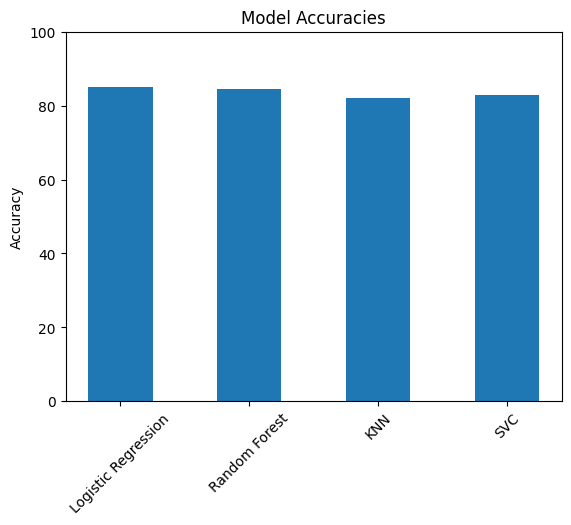

In [36]:
# Accuracy results
a_log = round((accuracy_log * 100), 3)
a_rf = round((accuracy_rf * 100), 3)
a_knn = round((accuracy_knn * 100), 3)
a_svc = round((accuracy_svc * 100), 3)

# Create a dictionary to store model names and their accuracies
model_accuracies = {
    'Logistic Regression': a_log,
    'Random Forest': a_rf,
    'KNN': a_knn,
    'SVC': a_svc
}

# Plot the bar chart
plt.bar(model_accuracies.keys(), model_accuracies.values(), width=0.5)

plt.title('Model Accuracies')
plt.ylabel('Accuracy')
plt.ylim(0, 100) 
plt.xticks(rotation=45)

plt.show()